## Distribution

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy
from mpl_toolkits.basemap import Basemap

df = sns.load_dataset('iris')

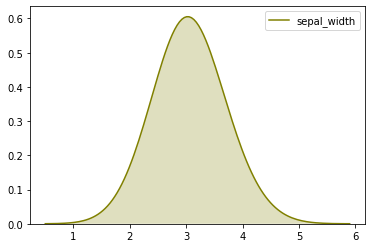

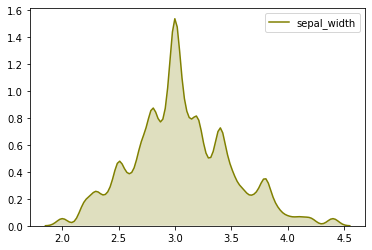

In [24]:
# Large bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=.5, color="olive")
plt.show()
 
# Narrower bandwidth
sns.kdeplot(df['sepal_width'], shade=True, bw=.05, color="olive")
plt.show()

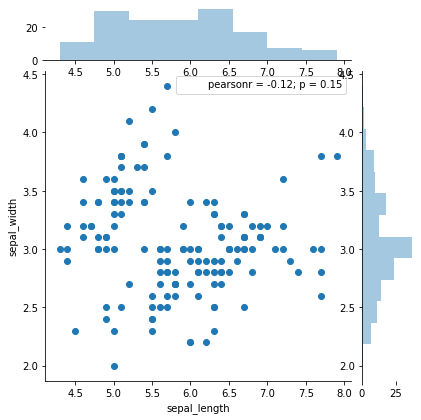

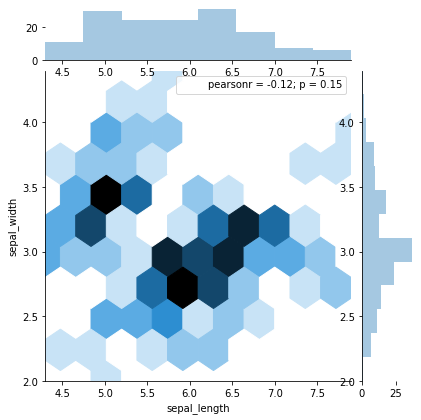

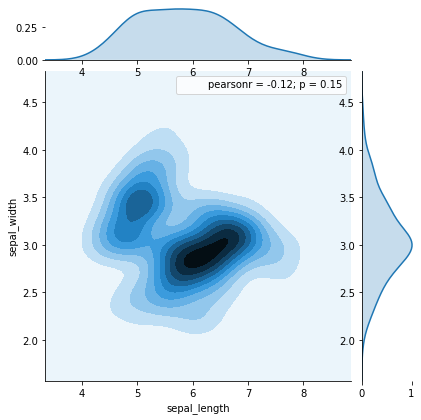

In [25]:
# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='hex')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='kde')

## Correlation

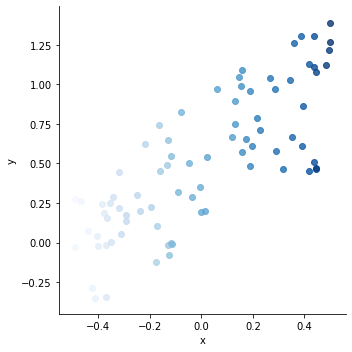

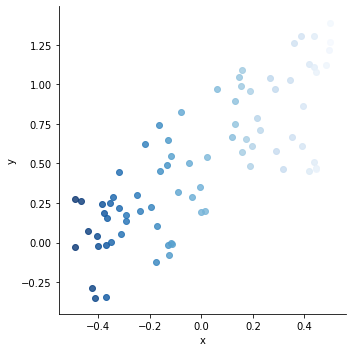

In [26]:
# create data
x = np.random.rand(80) - 0.5
y = x+np.random.rand(80)
z = x+np.random.rand(80)
df = pd.DataFrame({'x':x, 'y':y, 'z':z})
 
# Plot with palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues")
 
# reverse palette
sns.lmplot( x='x', y='y', data=df, fit_reg=False, hue='x', legend=False, palette="Blues_r")

## Ranking

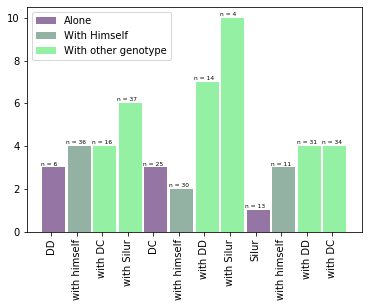

In [27]:
# Create bars
barWidth = 0.9
bars1 = [3, 3, 1]
bars2 = [4, 2, 3]
bars3 = [4, 6, 7, 10, 4, 4]
bars4 = bars1 + bars2 + bars3
 
# The X position of bars
r1 = [1,5,9]
r2 = [2,6,10]
r3 = [3,4,7,8,11,12]
r4 = r1 + r2 + r3
 
# Create barplot
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.1,0.4,0.6), label='Alone')
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.5,0.4,0.6), label='With Himself')
plt.bar(r3, bars3, width = barWidth, color = (0.3,0.9,0.4,0.6), label='With other genotype')
# Note: the barplot could be created easily. See the barplot section for other examples.
 
# Create legend
plt.legend()
 
# Text below each barplot with a rotation at 90°
plt.xticks([r + barWidth for r in range(len(r4))], ['DD', 'with himself', 'with DC', 'with Silur', 'DC', 'with himself', 'with DD', 'with Silur', 'Silur', 'with himself', 'with DD', 'with DC'], rotation=90)
 
# Create labels
label = ['n = 6', 'n = 25', 'n = 13', 'n = 36', 'n = 30', 'n = 11', 'n = 16', 'n = 37', 'n = 14', 'n = 4', 'n = 31', 'n = 34']
 
# Text on the top of each barplot
for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 6)
 
# Adjust the margins
plt.subplots_adjust(bottom= 0.2, top = 0.98)
 
# Show graphic
plt.show()

## Lollipop

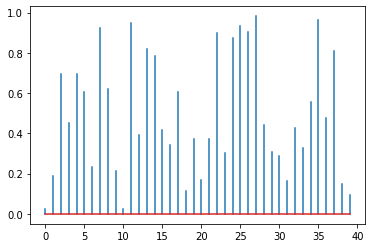

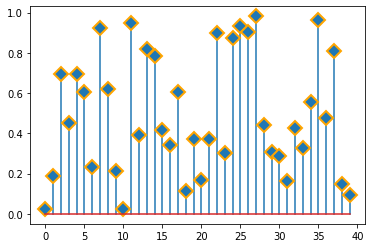

In [28]:
values=np.random.uniform(size=40)
 
# plot with no marker
plt.stem(values, markerfmt=' ')
plt.show()
 
# change color and shape and size and edges
(markers, stemlines, baseline) = plt.stem(values)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.show()

## Stacked Area

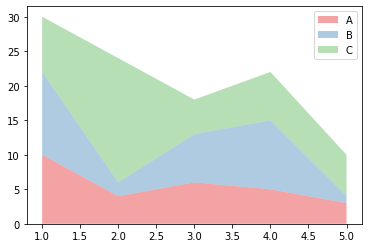

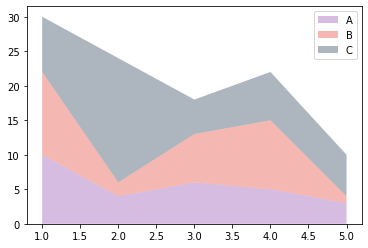

In [29]:
 
# Your x and y axis
x=range(1,6)
y=[ [10,4,6,5,3], [12,2,7,10,1], [8,18,5,7,6] ]
 
# use a known color palette (see..)
pal = sns.color_palette("Set1")
plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')
plt.show()
 
# create your palette
pal = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
plt.stackplot(x,y, labels=['A','B','C'], colors=pal, alpha=0.4 )
plt.legend(loc='upper right')

## Dendogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0]],
 'dcoord': [[0.0, 16.89707975262787, 16.89707975262787, 0.0],
  [0.0, 124.42513884575622, 124.42513884575622, 0.0],
  [16.89707975262787,
   189.75327331432254,
   189.75327331432254,
   124.42513884575622],
  [0.0, 131.24667573749386, 131.24667573749386, 0.0],
  [0.0, 236.74277069464608, 236.74277069464608, 0.0],
  [131.24667573749386,
   389.04227922692326,
   389.04227922692326,
   236.74277069464608],
  [189.75327331432254,
   955.3712450494048,
   955.3712450494048,
   389.04227922692326]],
 'ivl': ['18', '(3)', '(7)', '(5)', '(2)', '(5)', '(4)', '(5)'],
 'leaves': [18, 39, 52, 54, 48, 53, 55, 58],
 'color_list': ['g', 'g', 'g', 'r', 'r', 'r', 'b']}

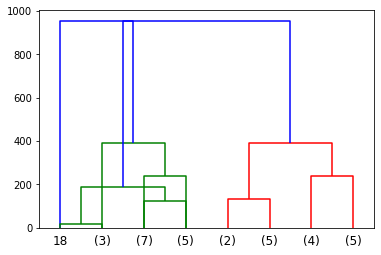

In [30]:
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
df
 
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward')
 
# method 1: lastp
hierarchy.dendrogram(Z, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
 
# method 2: level
hierarchy.dendrogram(Z, truncate_mode = 'level', p=2) # -> No more than ``p`` levels of the dendrogram tree are displayed.

## Network

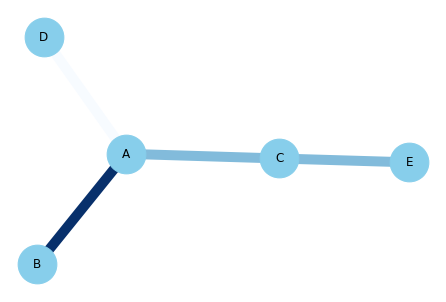

In [31]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C'], 'value':[1, 10, 5, 5]})
df
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# Custom the nodes:
nx.draw(G, with_labels=True, node_color='skyblue', node_size=1500, edge_color=df['value'], width=10.0, edge_cmap=plt.cm.Blues)

## Map of Tweets

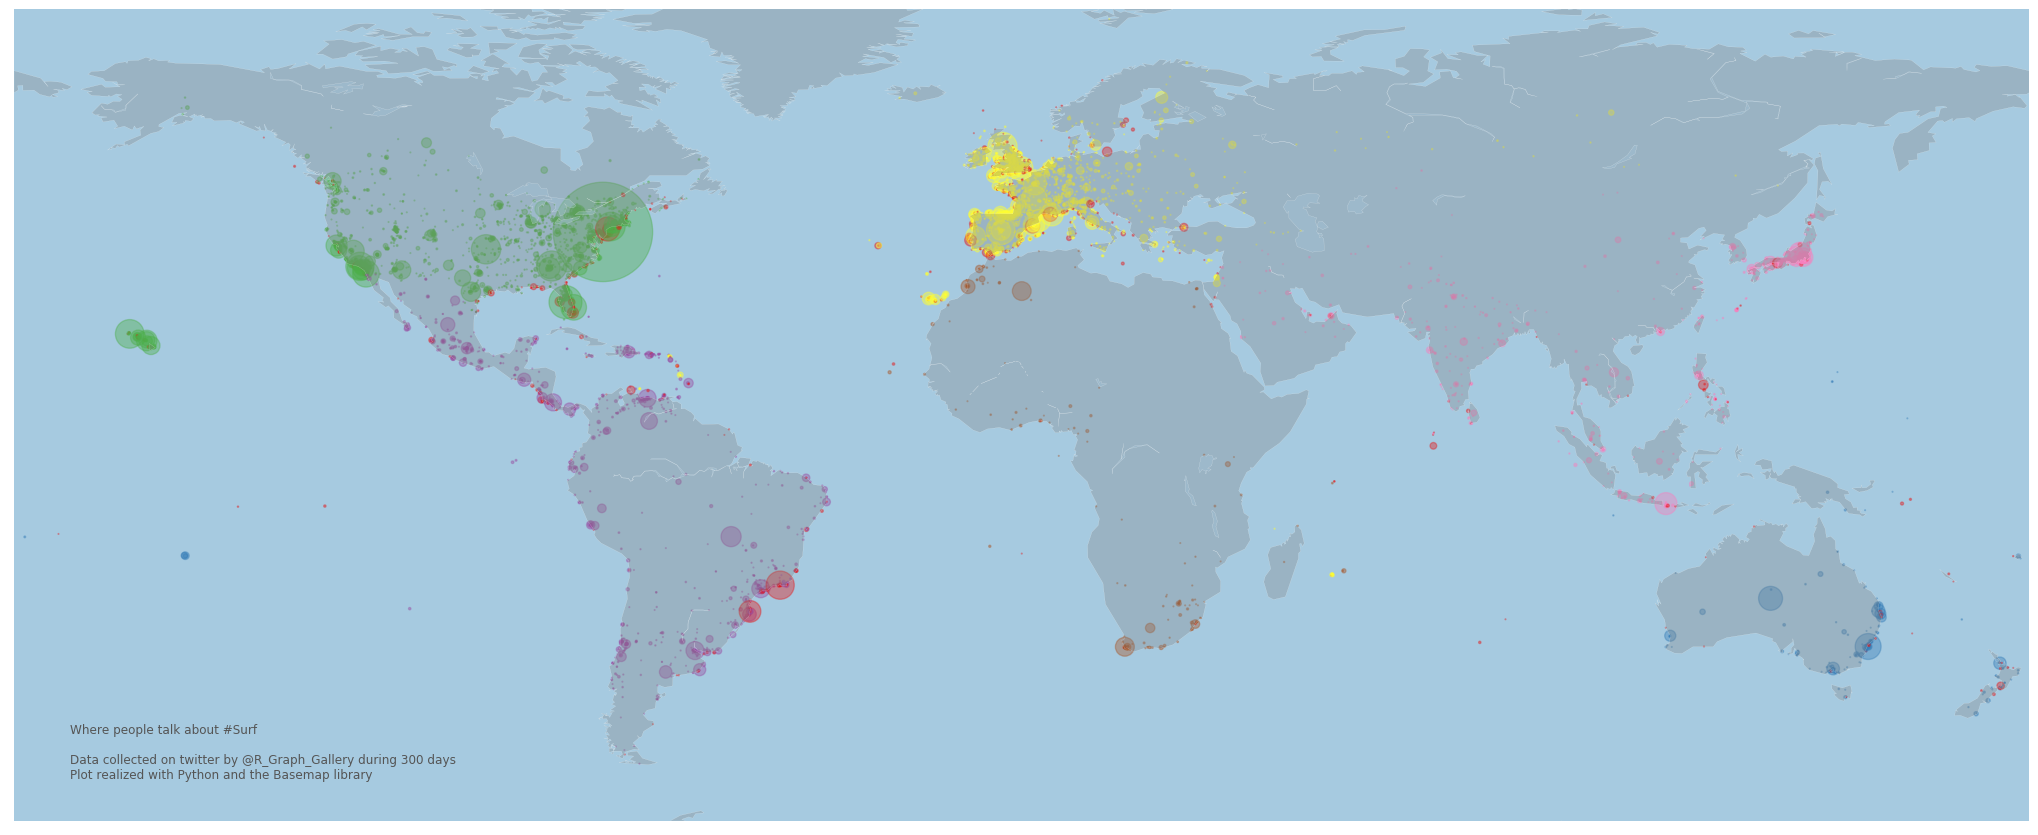

In [32]:
# Set the dimension of the figure
my_dpi=96
plt.figure(figsize=(2600/my_dpi, 1800/my_dpi), dpi=my_dpi)
 
# read the data (on the web)
data = pd.read_csv('http://python-graph-gallery.com/wp-content/uploads/TweetSurfData.csv', sep=";")
 
# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")
 
# prepare a color for each point depending on the continent.
data['labels_enc'] = pd.factorize(data['homecontinent'])[0]
 
# Add a point per position
m.scatter(data['homelon'], data['homelat'], s=data['n']/6, alpha=0.4, c=data['labels_enc'], cmap="Set1")
 
# copyright and source data info
plt.text( -170, -58,'Where people talk about #Surf\n\nData collected on twitter by @R_Graph_Gallery during 300 days\nPlot realized with Python and the Basemap library', ha='left', va='bottom', size=9, color='#555555' )
 
# Save as png
plt.savefig('#315_Tweet_Surf_Bubble_map1.png', bbox_inches='tight')

## Bokeh

In [35]:
# !conda install -c anaconda colorcet -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - colorcet


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    param-1.9.2                |             py_0          63 KB  anaconda
    colorcet-2.0.2             |             py_0         1.5 MB  anaconda
    pyct-0.4.6                 |           py36_0          23 KB  anaconda
    ------------------------------------------------------------
                                           Total:         1.6 MB

The following NEW packages will be INSTALLED:

    colorcet: 2.0.2-py_0   anaconda
    param:    1.9.2-py_0   anaconda
    pyct:     0.4.6-py36_0 anaconda


param-1

In [36]:
from numpy import linspace
from scipy.stats.kde import gaussian_kde

from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource, FixedTicker, PrintfTickFormatter
from bokeh.plotting import figure
from bokeh.sampledata.perceptions import probly

import colorcet as cc

output_file("ridgeplot.html")

def ridge(category, data, scale=20):
    return list(zip([category]*len(data), scale*data))

cats = list(reversed(probly.keys()))

palette = [cc.rainbow[i*15] for i in range(17)]

x = linspace(-20,110, 500)

source = ColumnDataSource(data=dict(x=x))

p = figure(y_range=cats, plot_width=900, x_range=(-5, 105), toolbar_location=None)

for i, cat in enumerate(reversed(cats)):
    pdf = gaussian_kde(probly[cat])
    y = ridge(cat, pdf(x))
    source.add(y, cat)
    p.patch('x', cat, color=palette[i], alpha=0.6, line_color="black", source=source)

p.outline_line_color = None
p.background_fill_color = "#efefef"

p.xaxis.ticker = FixedTicker(ticks=list(range(0, 101, 10)))
p.xaxis.formatter = PrintfTickFormatter(format="%d%%")

p.ygrid.grid_line_color = None
p.xgrid.grid_line_color = "#dddddd"
p.xgrid.ticker = p.xaxis[0].ticker

p.axis.minor_tick_line_color = None
p.axis.major_tick_line_color = None
p.axis.axis_line_color = None

p.y_range.range_padding = 0.12

show(p)

